# My Very Own Machinelearning Project
In this assignment I will take a look at a dataset I chose myself. The objective of the assignment is to demonstrate good principles of what I've learned throughout the course DAT158

## Porto Seguro’s Safe Driver Prediction
### Overview
This project will follow these steps:
1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor and maintain your system

## 1. Frame the problem and look at the big picture
In this assignment we will analyze the data from Porto Seguro, one of Brazil's largest insurance companies, where we are challenged to create a model that can accurately predict the probability that a driver will file an insurance claim the next year. The goal of this is to reduce the insurance premium for the good drivers and increase the premium for the bad ones

The datasets are located at ``/data/test.csv``and ``/data/train.csv`` 

Porto Seguro is using machine learning for this today, but they've reached out to see if there are new and more powerful methods to do this job. 

## 2. Get the data
The data has been pre-downloaded and stored in the ``/data/``folder, now we need to load this

### Load the data using "pandas"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Looking at the datastructure
The dataset was provided with a description on the data and its features:
*  Features that belong to __similar groupings are tagged__ as such in the feature names (e.g., ``ind``, ``reg``, ``car``, ``calc``)
* Feature names include the postfix __bin__ to indicate binary features and __cat__ to indicate categorical features. 
* Features _without_ these designations are either __continuous__ or __ordinal__.
* Values of __-1__ indicate that the feature was __missing__ from the observation.
* The __target__ columns signifies whether or not a claim was filed for that policy holder.

With this in mind, let us take a quick look at a few rows of data

In [2]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


The ``.head()``function shows the first 5 entries in the dataset. By using ``.tail()`` we can list out the 5 last ones.

In [3]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


Let's look at the number of rows and columns in the training and test data

In [4]:
train.shape

(595212, 59)

As stated on the website for this assignment there is 595,212 rows of data, and 59 columns. It would be smart to make sure that we have unique entries as we have an ``id`` column

In [5]:
train.drop_duplicates()
train.shape

(595212, 59)

We've now verfied that we have no duplicate entries. Perfect!

In [6]:
test.shape

(892816, 58)

The test set has way more data than the training set, and one less column. The missing column is the ``target``, but this is fine as this the feature that we are to determine

By using the ``.info()`` function we get usefull information about our dataset, eg. which columns are integers and which are floats.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

Looking at this we can clearly see that there are no features that are "null", this is because missing values has been replaces by ``-1``. This is something we will work with later

### Metadata
As the data in these sets can be quite hard to manage it's a good idea to store the metadata about the different variables. This can be done using a DataFrame. The reason for doing this is to have greater control over the different attributes, which comes especially handy when analyzing, visualizing or modelling.

For this datastructure we will store this:
* __role__: input, ID and target
* __level__: nominal, interval, ordinal, binary
* __keep__: True or False
* __dtype__: int, float, str

In [8]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [9]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


Here we can see how many variables belong in the different categories

In [10]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## 3. Explore the data to gain insights

Until now we have only taken a quick glance at the data and in this section we will go more in depth. One of the first things to look at are some statistics

### Descriptive stastistics
Using the ``describe()`` method on the training set would not make much sense on the categorical variables and the id. By using the ``meta`` we created in the prevoius section we can easily select the type of variables we we want to compute descriptive statistics on

#### Interval variables

In [11]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


**ps_reg values**
* only *ps_reg_03* has missing values
* the minimum and maximum range differs between the variables, for instance the max value for *ps_reg_01* is 0.9 and for *ps_reg_03* the value is ~4.04. This means that we might need to apply scaling

**ps_car values**
* *pc_car_12* and *pc_car_14* has missing values
* the minimum and maximum range also differs, scaling might be applied later

**ps_calc values**
* no missing values
* values seems to be going from 0 to 0.9, suspecting that this might be a ratio variable
* all the variables seems to have similar distribution

#### Binary variables

In [12]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Looking at the mean for the target we an see that the set is **strongly imbalanced** (meaning that there are alot more entries with _target=0_ than with _target=1_)
* From the means of all the variables it's clear that most of the values are 0

This is further supported by the plot below:

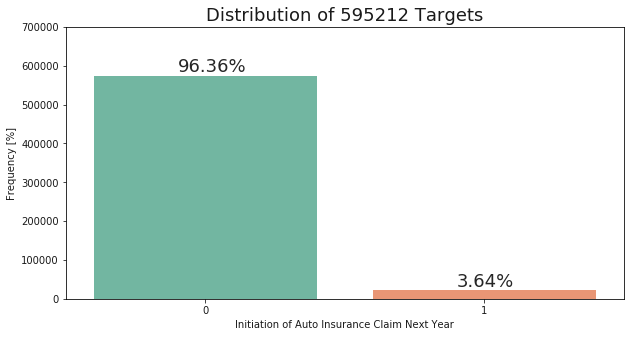

In [13]:
ax = sns.countplot(x = train.target.values ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=700000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(train.target.values)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of 595212 Targets')
plt.xlabel('Initiation of Auto Insurance Claim Next Year')
plt.ylabel('Frequency [%]')
plt.show()

In [14]:
#Maybe add section about handling imbalanced classes

### Correlation matrix looking at the big picture

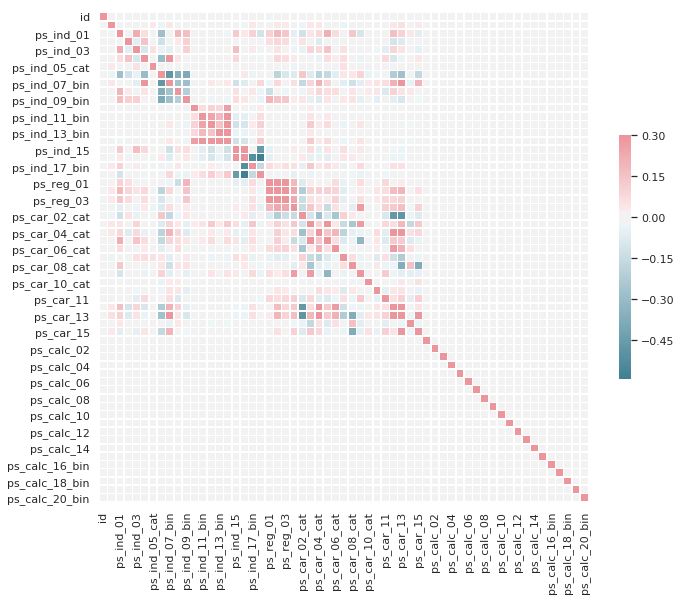

In [15]:
sns.set(style="white")
# Compute the correlation matrix
corr = train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

I can be seen that *ps_calc_* features have no realtion with the target at all, these can therefore be dropped

In [16]:
unwanted = train.columns[train.columns.str.startswith('ps_calc_')]

In [17]:
train = train.drop(unwanted, axis=1)  
test = test.drop(unwanted, axis=1)
meta.loc[(unwanted),'keep'] = False

## 4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
### Checking missing values
As stated in the description of the dataset missing values are represented as ``-1``

In [18]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missing values


#### What does this mean and how should we deal with it?
**ps_car_03_cat** and **ps_car_05_cat** have a very large portion of missing values, we will therefore drop them

In [19]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
test.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False

For the other categorical variables (from the columns with name ending in *_cat*) we can leave the missing -1 values

For the non categorical variables we will do the following:
* **ps_reg_03** (continuous) has missing values for 18% of all records. Replace by the mean.
* **ps_car_11** (ordinal) has only 5 records with misisng values. Replace by the mode.
* **ps_car_12** (continuous) has only 1 records with missing value. Replace by the mean.
* **ps_car_14** (continuous) has missing values for 7% of all records. Replace by the mean.

In [20]:
from sklearn.preprocessing import Imputer

mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Visualizing data
#### Categorical data
This plot will show us the proportions of customers with target = 1 from the categorical values

<Figure size 432x288 with 0 Axes>

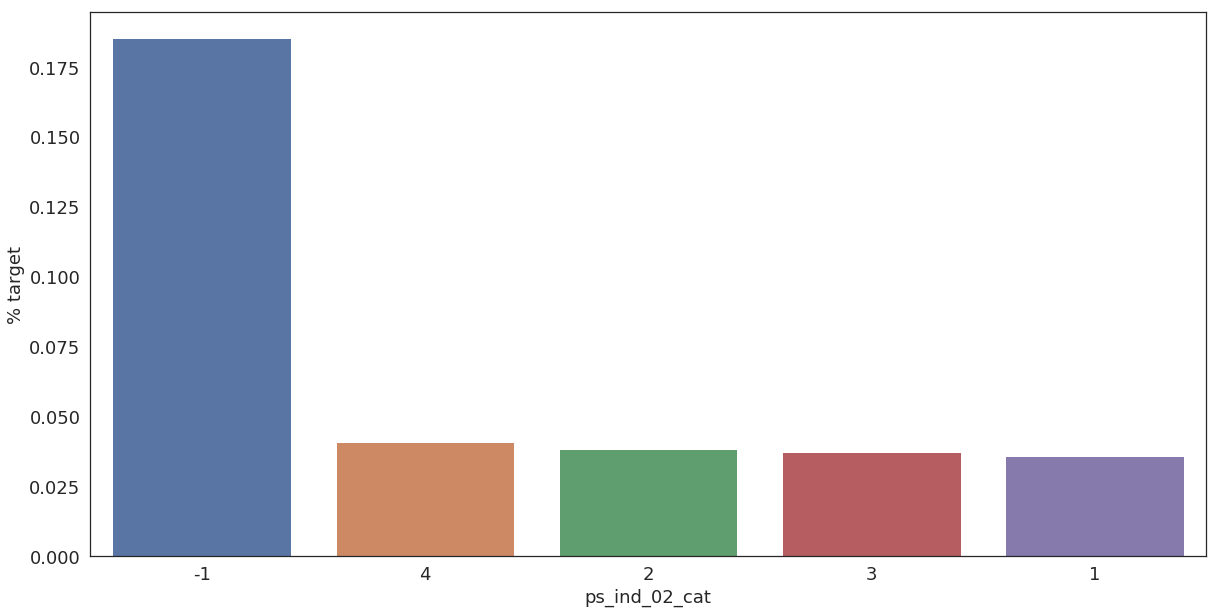

<Figure size 432x288 with 0 Axes>

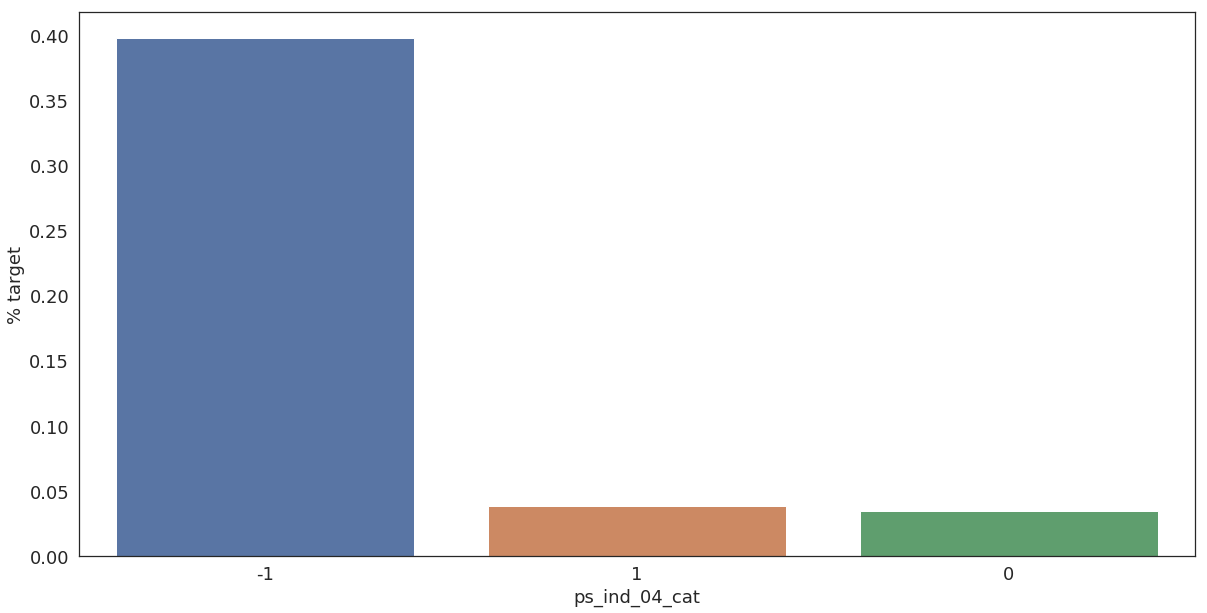

<Figure size 432x288 with 0 Axes>

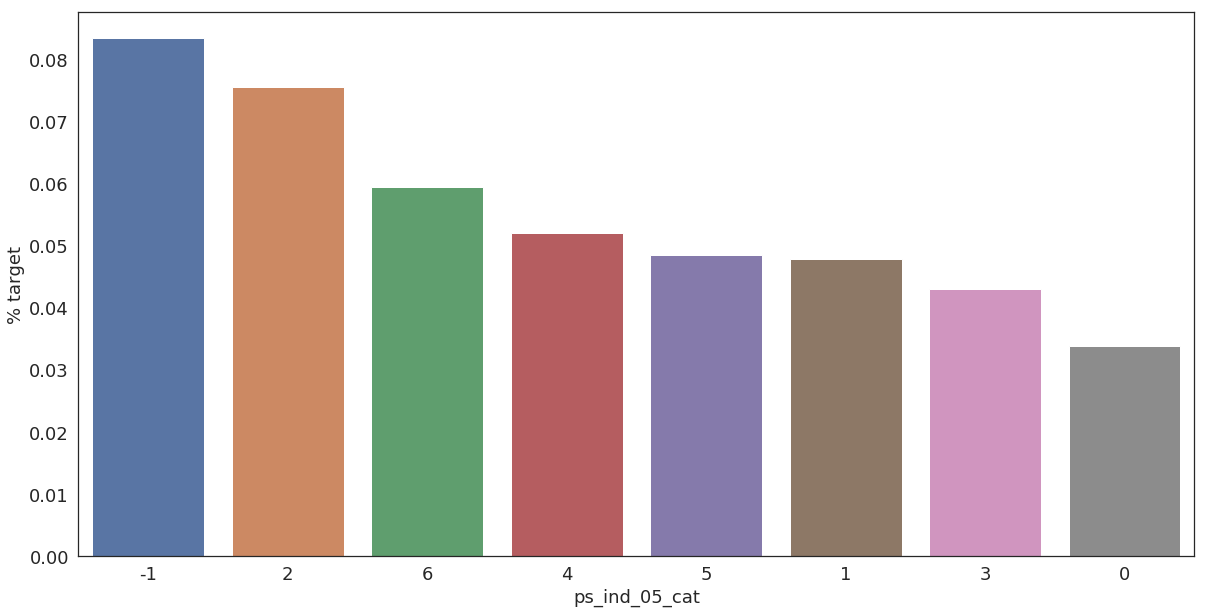

<Figure size 432x288 with 0 Axes>

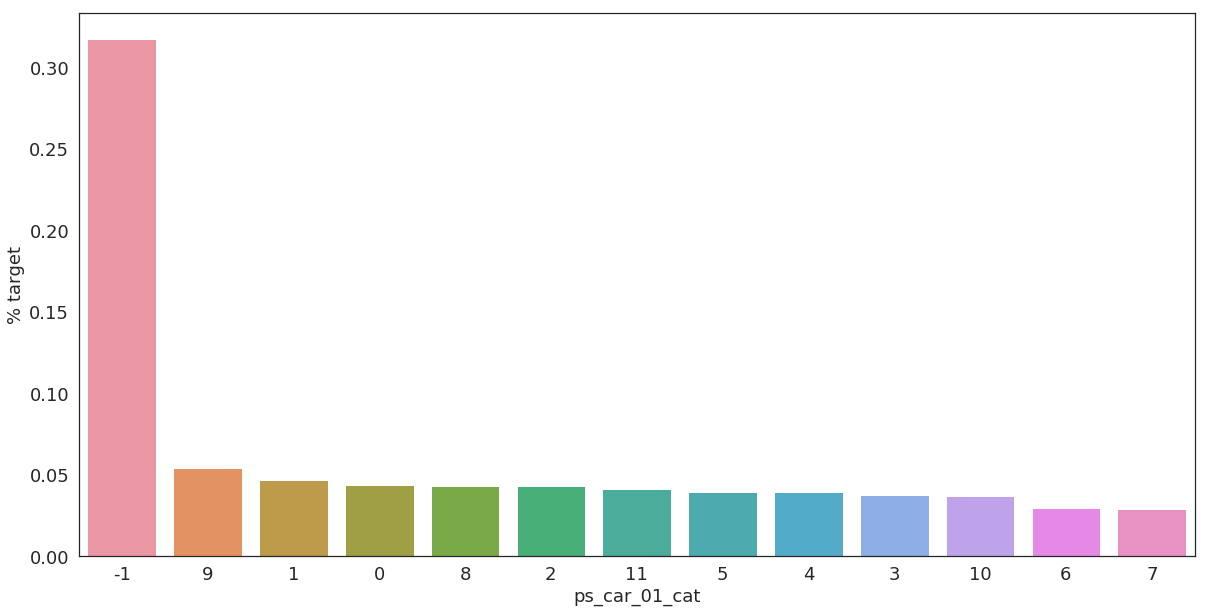

<Figure size 432x288 with 0 Axes>

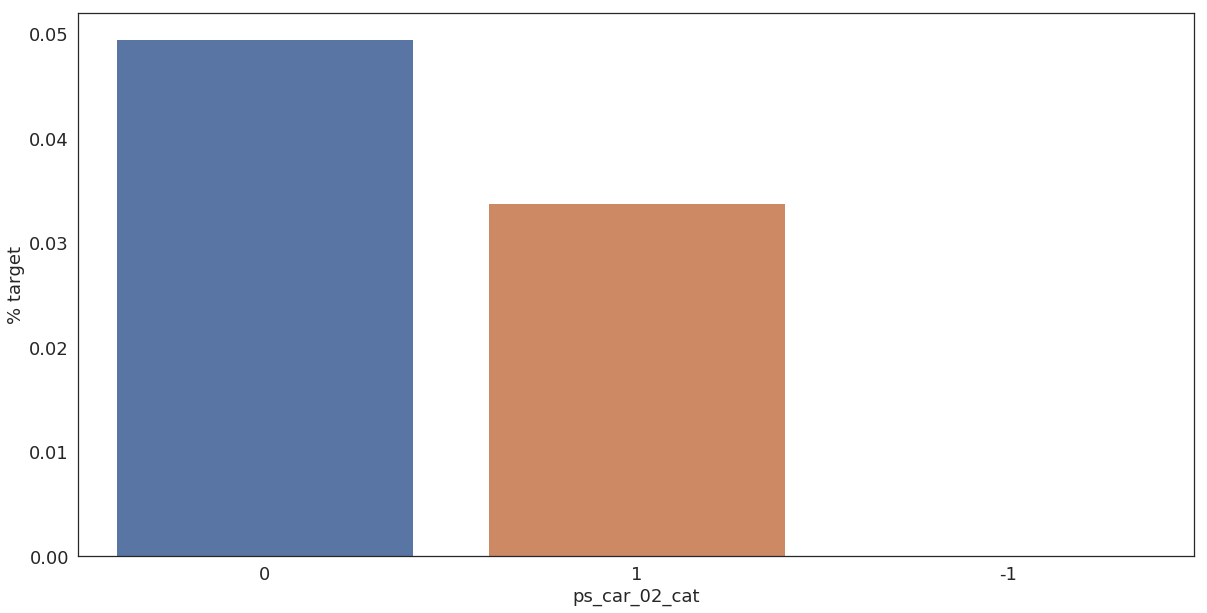

<Figure size 432x288 with 0 Axes>

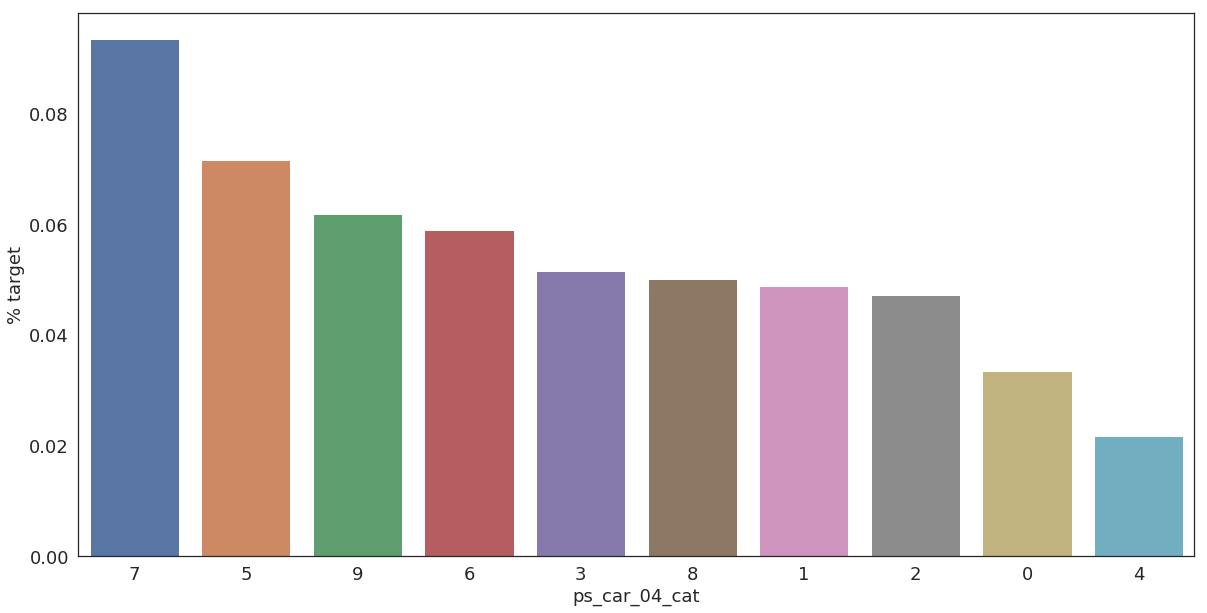

<Figure size 432x288 with 0 Axes>

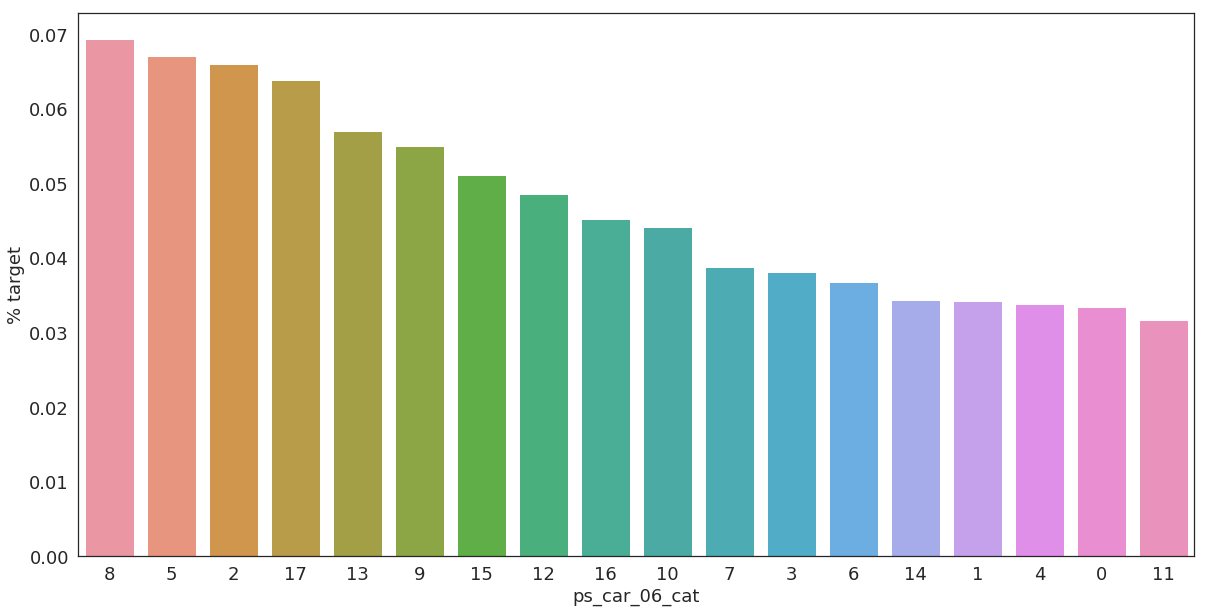

<Figure size 432x288 with 0 Axes>

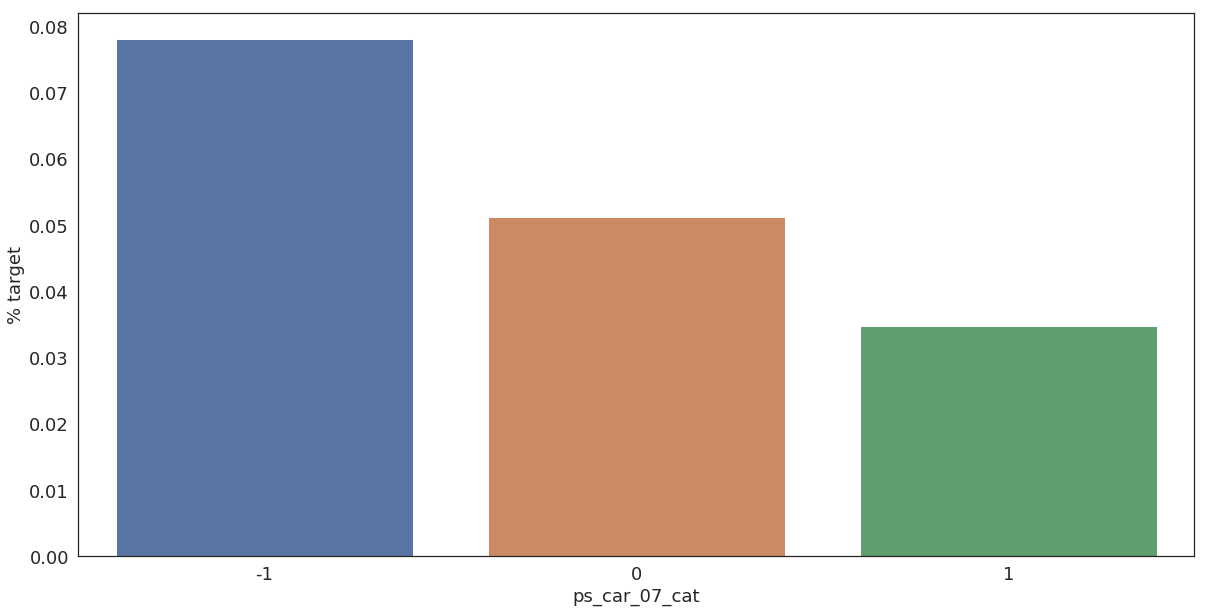

<Figure size 432x288 with 0 Axes>

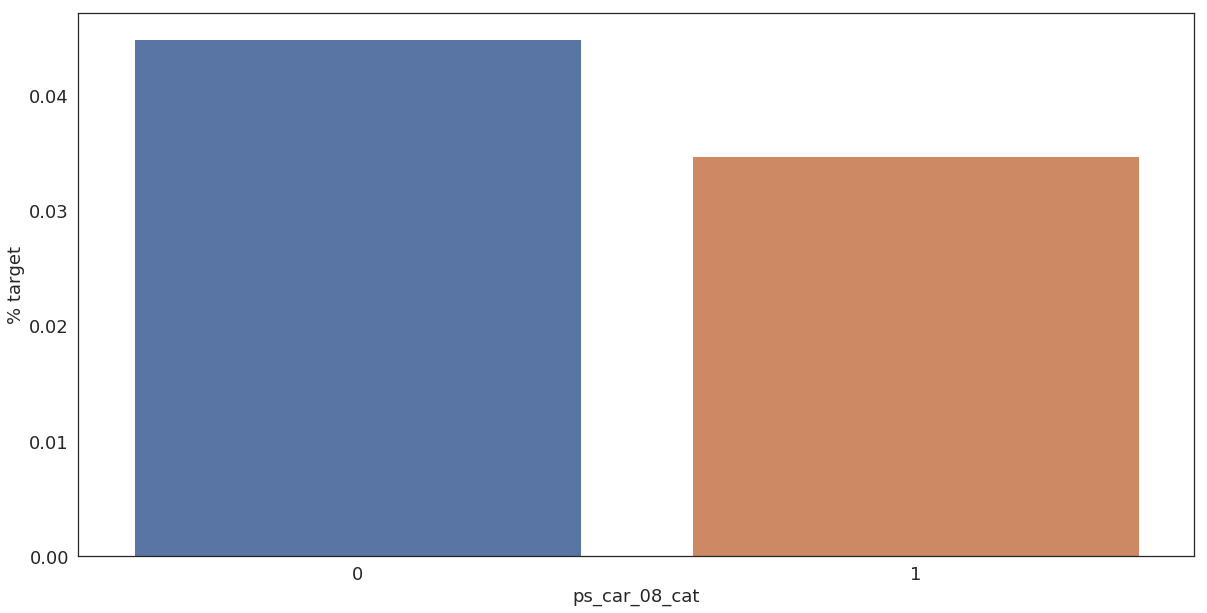

<Figure size 432x288 with 0 Axes>

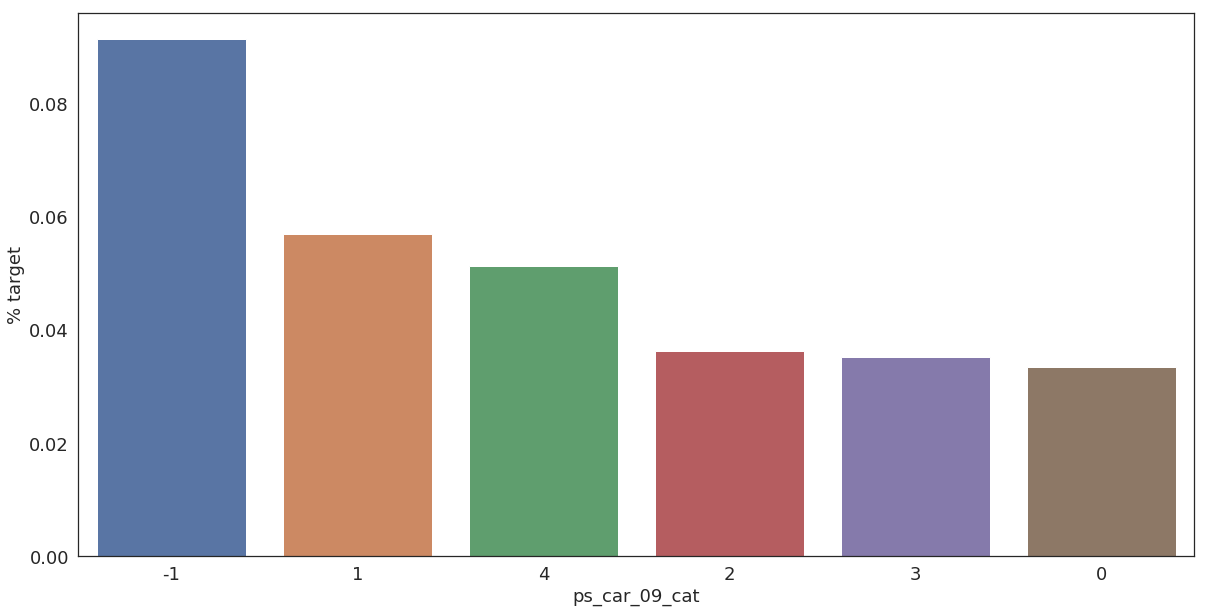

<Figure size 432x288 with 0 Axes>

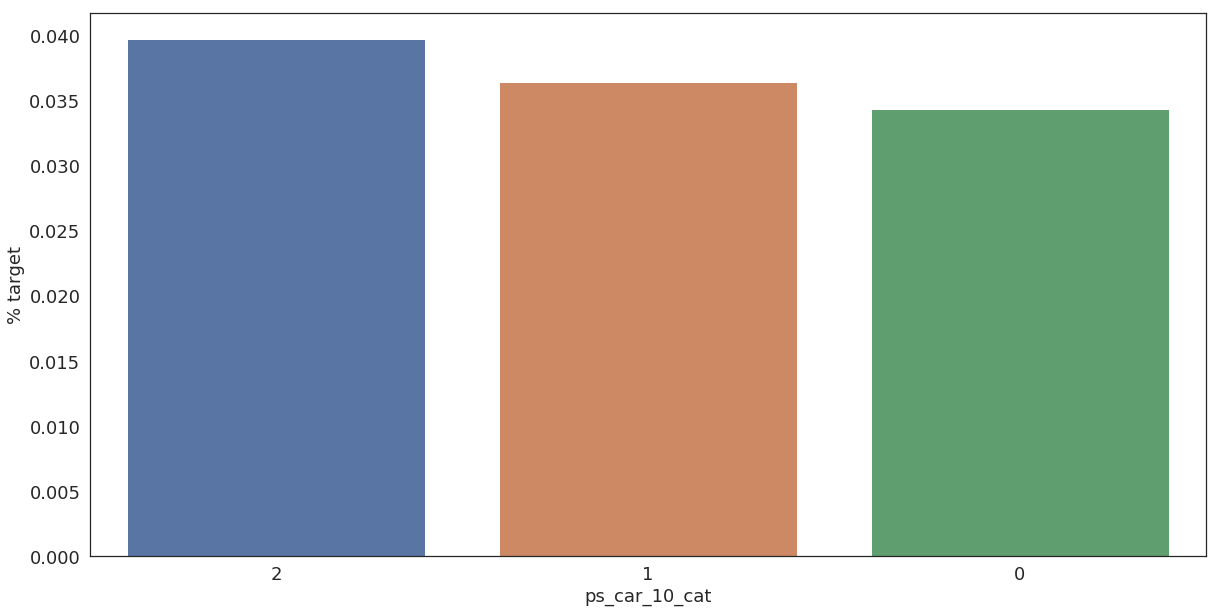

<Figure size 432x288 with 0 Axes>

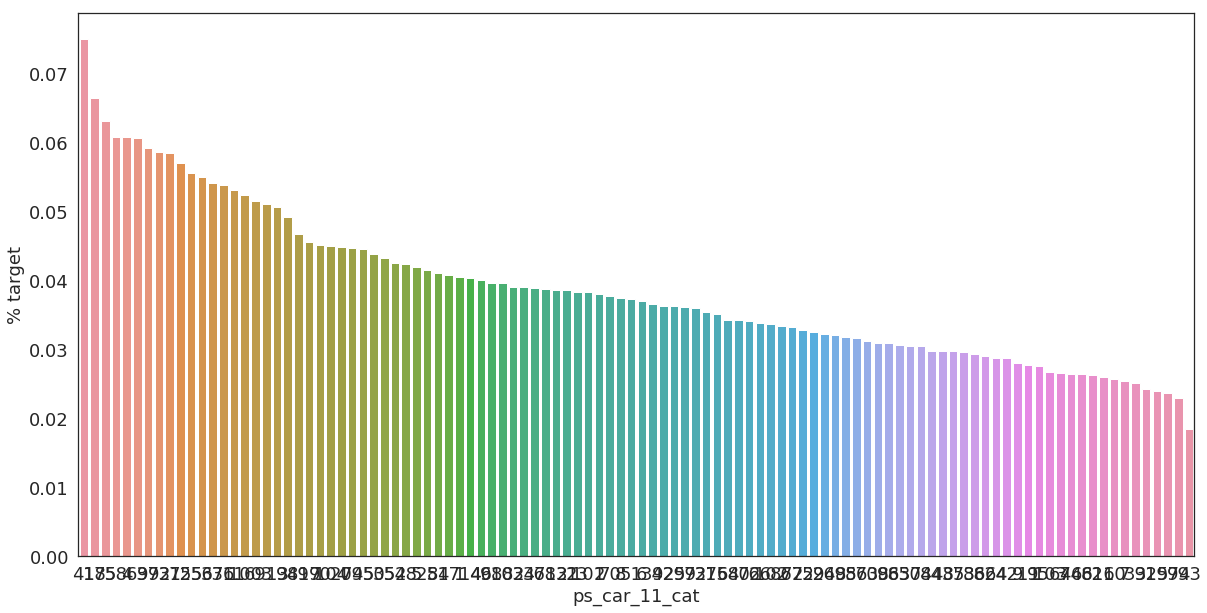

In [21]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

From this we get two things:
1. In many cases the entries that have missing values (-1) also have a higher percentage of insurance claims filed. This shows that it might be useful to have the missing values represented, and not replaced (for intance by the mode)
2. The variable *ps_car_11_cat* has alot of distinct values

In [22]:
distrinct_var = "ps_car_11_cat"
dist_value = train[distrinct_var].value_counts().shape[0]
print('Variable {} has {} distinct values'.format(distrinct_var, dist_value))

Variable ps_car_11_cat has 104 distinct values


#### ps_car_11_cat
Having 104 distinct values will cause an issue later when we create dummy variables for the categorical variables. 
It will also most likely have an effect on the model's perfomance further down in this notebook

In [23]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [24]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

#### Interval variables
For looking at correlation between interval variables it might be a good idea to use a heat map. This will give informative information about the correlations between the different variables.

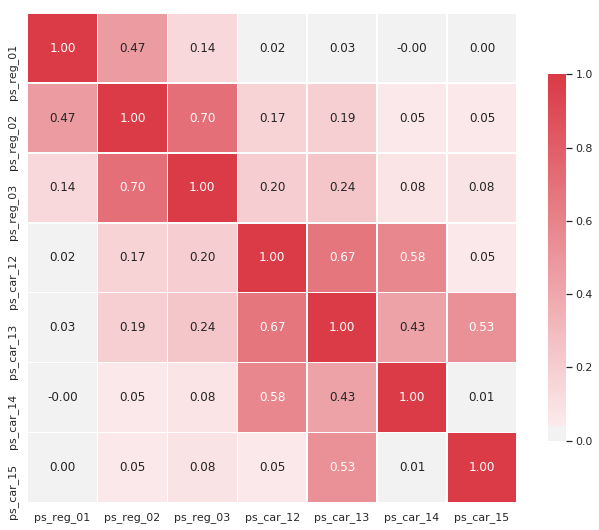

In [25]:
v = meta[(meta.level == 'interval') & (meta.keep)].index

# Compute the correlation matrix
corr = train[v].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})

plt.show()

There is a strong correlation between the following variables:
* *ps_reg_02* and *ps_reg_03* : **0.70**
* *ps_car_12* and *ps_car_13* : **0.67**
* *ps_car_12* and *ps_car_14* : **0.58**
* *ps_car_13* and *ps_car_15* : **0.53**

Now that we know which variables that have a relationship we can look at these individually.

***ps_reg_02* and *ps_reg_03***

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


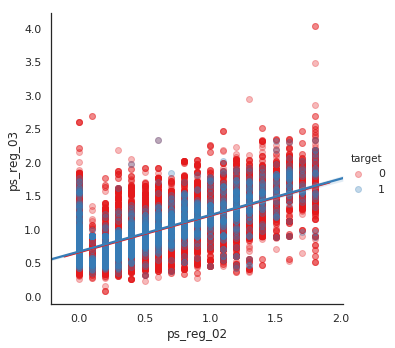

In [26]:
#sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=train, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
#plt.show()
#This code had to process a lot of data, I've therefore sampled some data from the train set
#to be used for the rest of the this visualization
s = train.sample(frac=0.1)
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

***ps_car_12* and *ps_car_13***

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


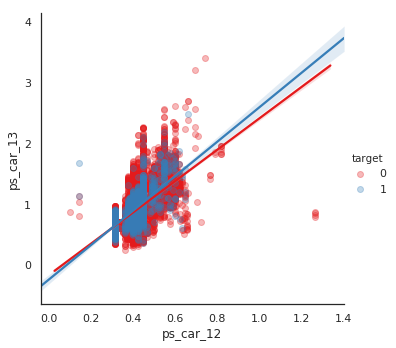

In [27]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

***ps_car_12* and *ps_car_14***

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


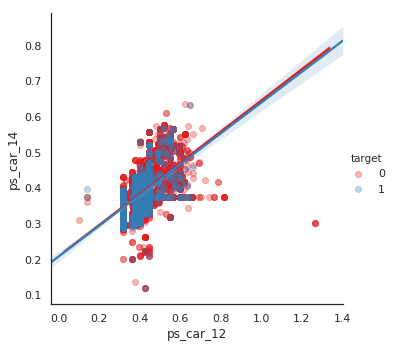

In [28]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

***ps_car_13* and *ps_car_15***

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


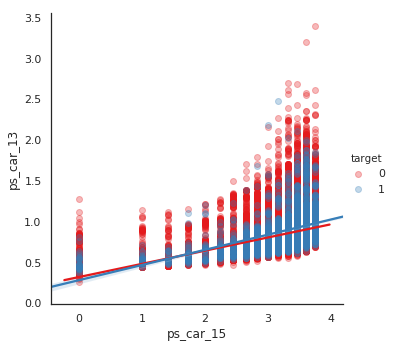

In [29]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

Looking at these plots it's not easy to decide which features to keep, and which ones that may be dropped.
Using Principal Component Analysis (PCA) we can look at how many features we need to still be able to explain the feature variance with high accuracy. This code has been created by the kaggle user [bertcarremans](https://www.kaggle.com/bertcarremans) and can be found in [this notebook on kaggle](https://www.kaggle.com/bertcarremans/reducing-number-of-numerical-features-with-pca)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
v = meta[(meta.level == 'interval') & (meta.keep)].index
train_nums_std = sc.fit_transform(train[v])

In [31]:
pca = PCA(n_components=None)
train_nums_pca = pca.fit_transform(train_nums_std)
varExp = pca.explained_variance_ratio_

([<matplotlib.axis.YTick at 0x7fdd5307a588>,
 <a list of 11 Text yticklabel objects>)

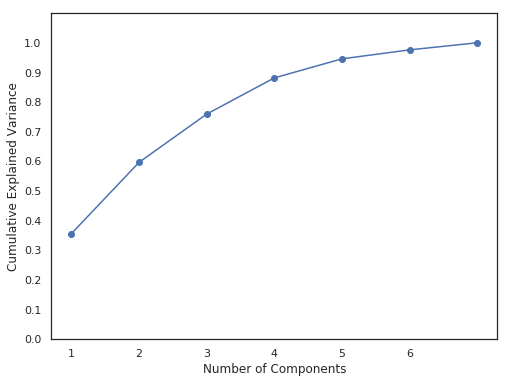

In [32]:
cumVarExplained = []
nb_components = []
counter = 1
for i in varExp:
    cumVarExplained.append(varExp[0:counter].sum())
    nb_components.append(counter)
    counter += 1

plt.subplots(figsize=(8, 6))
plt.plot(nb_components, cumVarExplained, 'bo-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylim([0.0, 1.1])
plt.xticks(np.arange(1, len(nb_components), 1.0))
plt.yticks(np.arange(0.0, 1.1, 0.10))

This plot shows that with 4 variables we are able to explain ~90% of the feature variance. We could therefore reduce the number of interval features to 4 and still have high accuracy. But since this dataset has few variables we will let the model we choose handle this

#### Ordinal variables

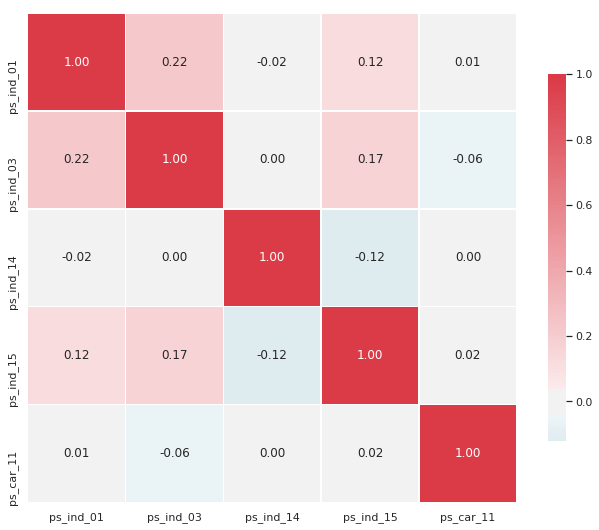

In [33]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index

# Compute the correlation matrix
corr = train[v].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})

plt.show()

Looking at this heat map we can see that there are not many correlations

### Dummy variables
The values of the categorical variables does not represent any order or magnitude. In order to make sure that the model we choose later is not affected by this and thinks that category 2 is twice the value of category 1 we create dummy variables.
Dummy variables are represented as boolean/binary values, this means that for each distinct value of the categorical values we will create a new variable and mark the corrensponding entries with a 1 if they previously contained the value that the new variable represents. More information about dummy variables can be found here: [Dummy Variable (Wikipedia)](https://en.wikipedia.org/wiki/Dummy_variable_(statistics))

This looks like OneHotEncoding, but since we are setting ``drop_first=True`` there will be one variable missing. This variable can be derived from the other variables created and is true when all of those are ``0``

In [34]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
test = pd.get_dummies(test, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 37 variables in train
After dummification we have 89 variables in train


### Interaction variables / PolynomialFeatures
In this section we will add some variables to better describe the interval variables. The reason behind adding this to the dataset is that with polynomial features, such as ``(1,x,y,x^2,x*y,y^2)``, we can better fit the data to a model. 

As the number of variables will increase exponentially if we increase the degree this can lead to overfitting, it's therefore suitable that we keep the degree to 2 in this case

In [35]:
from sklearn.preprocessing import PolynomialFeatures

v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
test = pd.concat([test, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 89 variables in train
After creating interactions we have 117 variables in train


In [36]:
interactions.head()

,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,...,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_14^2,ps_car_14 ps_car_15,ps_car_15^2
0,0.49,0.14,0.502649,0.280000,0.618575,0.259567,2.523886,0.04,0.143614,0.080000,...,0.1600,0.353472,0.148324,1.442221,0.780888,0.327677,3.186150,0.1375,1.336974,13.0
1,0.64,0.32,0.612862,0.252982,0.495053,0.310973,1.959592,0.16,0.306431,0.126491,...,0.1000,0.195687,0.122923,0.774597,0.382934,0.240544,1.515785,0.1511,0.952155,6.0
2,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.1000,0.202887,0.109818,1.048809,0.411632,0.222807,2.127899,0.1206,1.151781,11.0
3,0.81,0.18,0.522853,0.336749,0.488654,0.265462,1.800000,0.04,0.116190,0.074833,...,0.1400,0.203153,0.110363,0.748331,0.294793,0.160147,1.085898,0.0870,0.589915,4.0
4,0.49,0.42,0.588531,0.221249,0.396082,0.255572,1.400000,0.36,0.504455,0.189642,...,0.0999,0.178842,0.115398,0.632139,0.320165,0.206587,1.131663,0.1333,0.730205,4.0


Getting a quick overview making sure that the variables seem to have correct properties

In [37]:
#sampling data from train as it is too big to compute on my computer
train = train.sample(frac=0.1)

Next up we will find out which variables that have the lowest variance and remove these to ensure that the run time wont be too long, and removing these should have little to no effect on the end result

In [38]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


In [39]:
from sklearn.ensemble import RandomForestClassifier

X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


 1) ps_car_11_cat_te               0.036122
 2) ps_car_13^2                    0.031743
 3) ps_car_13                      0.031575
 4) ps_reg_03 ps_car_13            0.030981
 5) ps_car_12 ps_car_13            0.030916
 6) ps_reg_01 ps_car_13            0.030317
 7) ps_car_13 ps_car_14            0.030141
 8) ps_car_13 ps_car_15            0.029824
 9) ps_reg_03 ps_car_14            0.029651
10) ps_reg_03 ps_car_12            0.028334
11) ps_reg_03 ps_car_15            0.027773
12) ps_reg_03^2                    0.027119
13) ps_reg_03                      0.026956
14) ps_reg_01 ps_reg_03            0.026316
15) ps_reg_02 ps_car_13            0.026117
16) ps_car_14 ps_car_15            0.024625
17) ps_reg_01 ps_car_14            0.024495
18) ps_reg_02 ps_reg_03            0.023037
19) ps_ind_03                      0.022538
20) ps_reg_02 ps_car_14            0.022235
21) ps_car_12 ps_car_14            0.021794
22) ps_car_14                      0.021377
23) ps_car_14^2                 

In [40]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 115
Number of features after selection: 58


In [41]:
train = train[selected_vars + ['target']]
test = test[selected_vars]

We've now updated the test and training set with the appropriate variables

## 5. Explore many different models and short-list the best ones
### Linear regression
We'll start of this secction by using Scikit Learn's LinearRegression model

First let's prepare X_train and y_train

In [42]:
X_train = train.drop(['target'], axis=1)
y_train = train.target

Import the Linear Regression model and fit our training data and lables

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
from sklearn.metrics import mean_squared_error

insurance_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, insurance_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.186890497604094

We've now run a mean sqare error function on our prediction, but this gives us an inaccurate result

### Decision Tree Regressor
In attempt to fix this we will try another a more complex model, the _DecisionTreeRegressor_

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [46]:
insurance_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, insurance_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

We get a 0% error rate, meaning that either the model is really good, or the more likely thing is that the model is overfitting our data. This is bad as it creates strict rules for which brances our un-trained data can use and will be useless if this is in fact the case

We do not want to touch our test set yet meaning that we should use part of our training set for training, and part for model validation.

### Better Evaluation Using Cross-Validation
We will use the train_test_split function to split our training set into smaller training set and validation set, then train, and then evaluate.

The code we use here will perform a K-fold cross validation which means that it will randomly split the training set into 10 distinct subsets (called a fold), then trains and evaluates the model 10 times. It does this by picking a different fold each time for validation and does training on the 9 other folds. This results in 10 evaluations scores.

You do not have to split the training data and test data to use K-fold cross validation, but it will be a good thing to have when we will try to use XGBoost later

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['target'], axis=1), train['target'], test_size=0.33, random_state=42)

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
            tree_reg, 
            X_train, 
            y_train, 
            scoring='neg_mean_squared_error', 
            cv=10
        )

tree_rmse_scores = np.sqrt(-scores)

In [49]:
def display_scores(scores):
    print("Scores:", scores)
    print("Means:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [0.2962487  0.27151641 0.28547239 0.28678692 0.28059973 0.30003343
 0.27790591 0.2663886  0.27197779 0.29373527]
Means: 0.28306651587956594
Standard deviation: 0.010781152771791966


We can now see that the model has a standard deviation of 28%, which is worse than the Linear Regresssion

Just to be sure we can do cross validation for the linear regression model as well

In [50]:
lin_scores = cross_val_score(
                lin_reg,
                X_train,
                y_train,
                scoring='neg_mean_squared_error',
                cv=10
            )

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.20071404 0.18389534 0.18296522 0.19283999 0.18854888 0.19299519
 0.17440398 0.18112332 0.17990421 0.19253837]
Means: 0.18699285389986145
Standard deviation: 0.007487712602751858


The standard deviation with this model yields a 18% error rate, which is in fact better than the DecisionTreeRegressor

### Random Forest Regressor
After using the two models above we can try an even more complicated model, though we are not guaranteed that this model will produce a better result

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
insurance_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, insurance_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.08595696898194237

This looks promising, a very low RMSE score!

In [52]:
forest_scores = cross_val_score(
                    forest_reg,
                    X_train,
                    y_train,
                    scoring='neg_mean_squared_error',
                    cv=10
                )

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.21332257 0.19783178 0.19627933 0.20968286 0.20247342 0.21010099
 0.19248025 0.19790148 0.19675782 0.20802799]
Means: 0.20248584968835376
Standard deviation: 0.006870643516488309


In fact this model is actually performing worse than the Linear Regression one, with a bit higher score

#### Feature importance
Let's look at the feeature importances of RandomForestRegressor

In [53]:
importances = forest_reg.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(10): 
    print(f'{X_train.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

ps_car_11_cat_te: 0.08
ps_reg_01 ps_car_13: 0.04
ps_reg_03 ps_car_13: 0.04
ps_car_13 ps_car_14: 0.04
ps_reg_03 ps_car_14: 0.04
ps_car_13 ps_car_15: 0.04
ps_reg_02 ps_car_13: 0.03
ps_car_14 ps_car_15: 0.03
ps_car_12 ps_car_13: 0.03
ps_reg_03 ps_car_12: 0.03


Looking at this we can see that *ps_car_11_cat_te* is the most important feature for the RandomForestRegressor

### XGBoost
Let's try the arguably best model; XGBoost

In [54]:
#!pip install xgboost

When using XGBoost I have used parameters that have been calculated by someone else, and tweeked some of them myself. This is because I do not have access to a powerfull computer that can computate these values for me, the score of this model will therefore also be lower than other scores on Kaggle

Anyways, with our split training set we create our matrices and train our XGBoost model

In [55]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

#xgb_pars = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
#            'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
#            'eval_metric': 'rmse', 'objective': 'reg:linear'}

xgb_pars = {
    'min_child_weight': 10.0,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'max_delta_step': 1.8,
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'eta': 0.025,
    'gamma': 0.65,
    'num_boost_round' : 700,
    }

# You could try to train with more epoch
model = xgb.train(xgb_pars, dtrain, 1600, watchlist, early_stopping_rounds=70, 
                  maximize=True, verbose_eval=100)


print('Modeling RMSE %.5f' % model.best_score)

[0]	train-error:0.036536	valid-error:0.036656
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 70 rounds.
Stopping. Best iteration:
[0]	train-error:0.036536	valid-error:0.036656

Modeling RMSE 0.03666


In [56]:
predictions = model.predict(xgb.DMatrix(X_test))

In [57]:
final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.20312485910746836


Using this model we get a mean of 0.21 which is worse than the other models, the reason for this might be that there is too little data for the model to work with.

## 6. Fine-tune your models and combine them into a great solution

Fine tuning a XGBoost model will usually require a lot of computational power and time, since I have neither I have used parameters from Kaggle and will instead fine-tune the RandomForestRegressor in the hopes that I will achieve a better result

By using randomized search you can evaluate a given number of random combinations by selecting a random value for each hyperparamter at every iteration. This will give you more control over the computing budget and you get for, let's say 1,000 iterations, 1,000 different values for each hyperparameter instead of a few for wach which you will get with the grid search approach

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(
                forest_reg, 
                param_distributions=param_distribs,
                n_iter=10, 
                cv=5, 
                scoring='neg_mean_squared_error', 
                random_state=42
            )

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdd52fd1908>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdd5224dd30>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [59]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.19074623259841245 {'max_features': 7, 'n_estimators': 180}
0.1966150921886377 {'max_features': 5, 'n_estimators': 15}
0.19079390489570525 {'max_features': 3, 'n_estimators': 72}
0.19465664182455142 {'max_features': 5, 'n_estimators': 21}
0.19101563760054613 {'max_features': 7, 'n_estimators': 122}
0.19070186652691443 {'max_features': 3, 'n_estimators': 75}
0.19051091230227543 {'max_features': 3, 'n_estimators': 88}
0.1908795717409191 {'max_features': 5, 'n_estimators': 100}
0.19005161478846383 {'max_features': 3, 'n_estimators': 150}
0.2360477676436358 {'max_features': 5, 'n_estimators': 2}


In [60]:
rnd_search.best_params_

{'max_features': 3, 'n_estimators': 150}

We have now tuned the RandomForestRegressor model and we've gotten a significantly better result

## 7. Final Model / Presenting the solution
This part of this assignment is quite boring. I can not validate the training set against the real test set, as it is without the target variable. But I have to the best of my ability done the same tranformations on the training set and test set through out the assignment.

For what I present as my final solution will be the LinearRegression after Cross Validation model which has an error rate of 18%

In [62]:
display_scores(lin_rmse_scores)

Scores: [0.20071404 0.18389534 0.18296522 0.19283999 0.18854888 0.19299519
 0.17440398 0.18112332 0.17990421 0.19253837]
Means: 0.18699285389986145
Standard deviation: 0.007487712602751858


## 8. Launch, monitor and maintain your system
After launching the system it needs to be monitored, this can be achieved by writing monitor code which can alert us if the system perfomance drops. It's important to catch sudden breakages and perfomance that decays over time (which can happen if the model isn't regularly trained on fresh data)

The predictions that the system makes should be checked from time to time that they are correct, this is usually done through experts on the field or by using workers on a crowdsourcing platform.

Data comming into the system must be correct, if you recive data that are not correct the systm performance may decay a but, but it might take time before this is cought. If we evalute the imput and makes sure this is correct we can (try to) avoid this.
NOTE! The input used here has been formatted and worked with to try and achieve better performance

Automating the training process can save you alot of time and making sure that the perfomance is up to date. If the system is learning online it's also important that regular snapshots of the system is stored so you can rollback to a previously working state if the system were to fail/perform badly.